# **IQR Method**


### IQR Method for Outlier Detection

The **Interquartile Range (IQR)** method is a robust statistical technique used primarily for identifying outliers in a dataset. The Interquartile Range (IQR) is the range between the first quartile (Q1) and the third quartile (Q3) of a dataset. It represents the middle 50% of the data, providing a measure of statistical dispersion.

This method is used when data is skewed. This method is plotted with the help of **Boxplot**.


#### **How it's Used:**

1.  **Calculate Quartiles:**
    *   **Q1 (First Quartile):** The value below which 25% of the data falls.
    *   **Q3 (Third Quartile):** The value below which 75% of the data falls.
2.  **Calculate IQR:**
    *   `IQR = Q3 - Q1`
3.  **Define Outlier Boundaries:**
    *   **Lower Bound:** `Q1 - 1.5 * IQR`
    *   **Upper Bound:** `Q3 + 1.5 * IQR`
4.  **Identify Outliers:** Any data point falling below the Lower Bound or above the Upper Bound is considered an outlier.

#### **When it's Used:**

The IQR method is particularly useful in the following scenarios:
*   **Non-normally Distributed Data:** When your data does not follow a Gaussian (normal) distribution, methods relying on mean and standard deviation (like the Z-score method) may not be appropriate.
*   **Robustness to Extreme Values:** If you want an outlier detection method that is less influenced by the extreme values themselves, as the IQR only considers the spread of the middle 50% of the data.
*   **Exploratory Data Analysis (EDA):** A quick and intuitive way to spot potential anomalies during the initial data exploration phase.



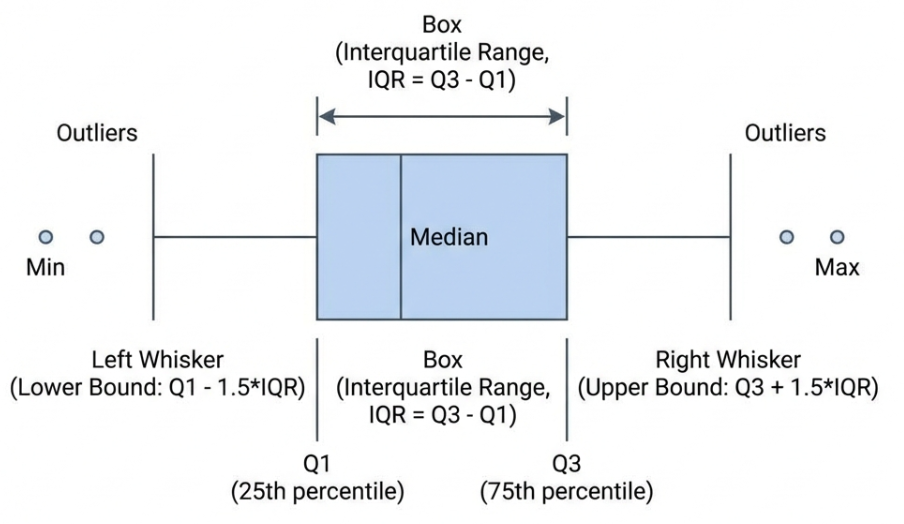

#### **Advantages:**

*   **Robustness:** It is less sensitive to extreme values (outliers) compared to methods that use the mean and standard deviation, as it relies on quartiles.
*   **No Distribution Assumption:** It does not assume that the data is normally distributed, making it suitable for skewed datasets.
*   **Simplicity:** Relatively easy to understand and implement.

#### **Disadvantages:**

*   **Data Loss:** It only considers the middle 50% of the data, potentially ignoring valuable information from the extreme ends of the distribution.
*   **Can Mask Outliers:** If a significant portion of the data consists of outliers, the IQR itself can become inflated, making it harder to detect individual outliers.
*   **Less Powerful for Normal Data:** For perfectly normally distributed data, methods based on standard deviation (e.g., Z-score) might be more statistically powerful in detecting outliers.


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv('placement.csv')
print(df.isna().mean())     
df.sample(5)

cgpa                    0.0
placement_exam_marks    0.0
placed                  0.0
dtype: float64


,cgpa,placement_exam_marks,placed
225,7.36,13.0,1
687,6.81,23.0,0
79,7.63,19.0,1
617,7.08,22.0,0
42,7.46,71.0,1


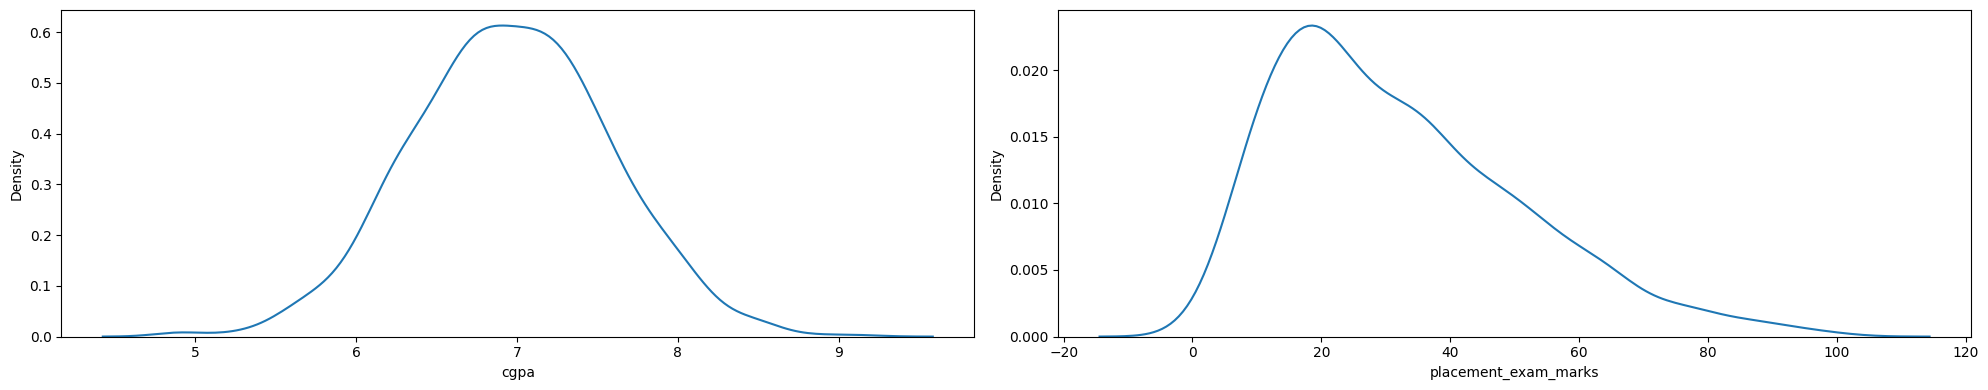

In [26]:
plt.figure(figsize=(20,4))

plt.subplot(121)
sns.kdeplot(df['cgpa'])

plt.subplot(122)
sns.kdeplot(df['placement_exam_marks'])

plt.tight_layout()
plt.show()  

In [27]:
print(df['cgpa'].describe())
print()
print(df['placement_exam_marks'].describe())

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64


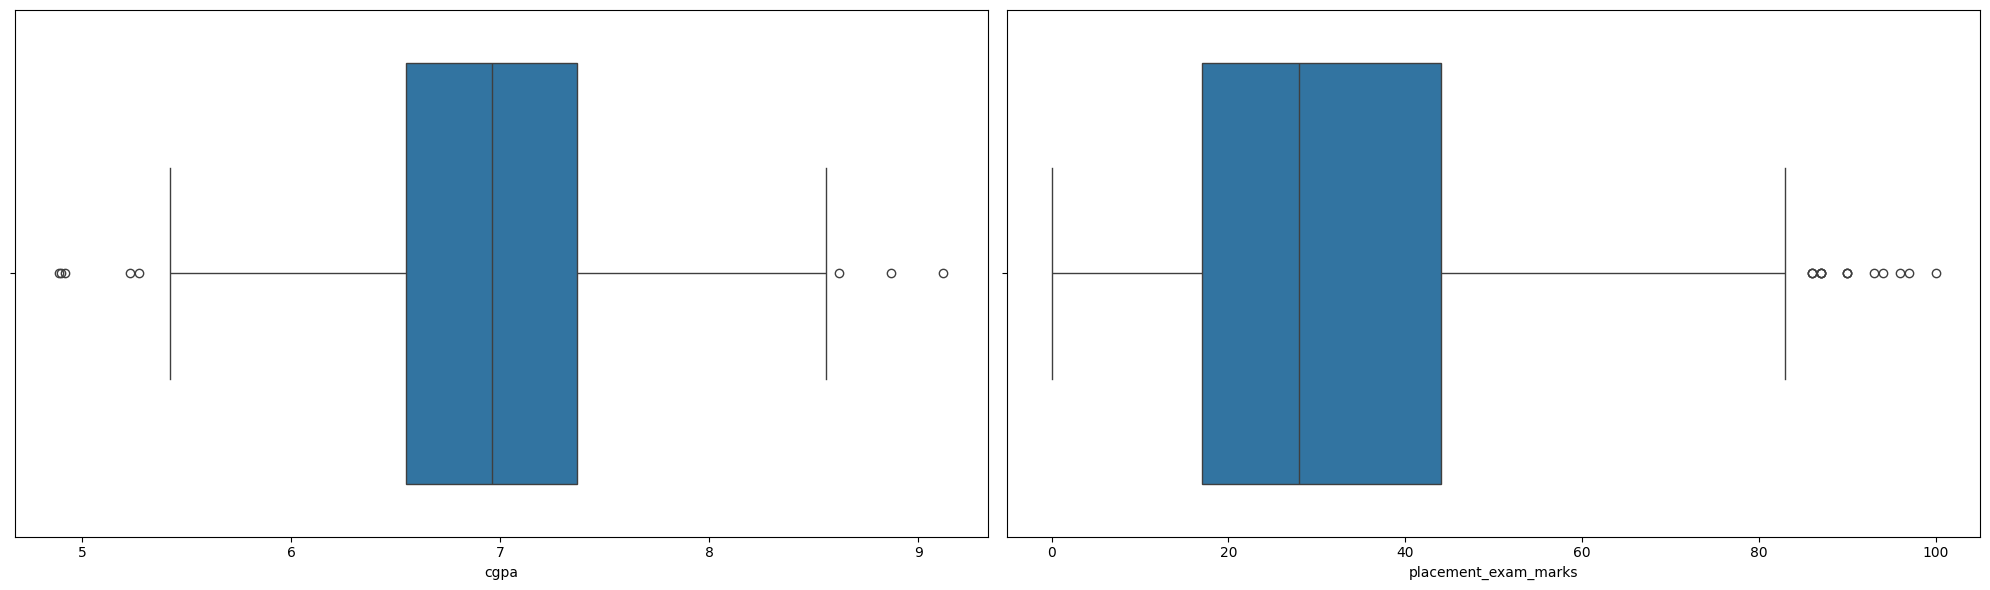

In [28]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.boxplot(x=df['cgpa'])

plt.subplot(122)
sns.boxplot(x=df['placement_exam_marks'])

plt.tight_layout()
plt.show()  

In [ ]:
# finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)        # q1
percentile75 = df['placement_exam_marks'].quantile(0.75)        # q3

print(percentile25)     # will print the value which is at 25 quartile
print(percentile75)     # will print the value which is at 75 quartile

iqr = percentile75 - percentile25
iqr                     # this is the 50 quartile or the median value of entire data


17.0
44.0


np.float64(27.0)

In [35]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

print(f"UPPER LIMIT : {upper_limit}")
print(f"LOWER LIMIT : {lower_limit}")

UPPER LIMIT : 84.5
LOWER LIMIT : -23.5


### **Finding Outliers**

In [60]:
df[df['placement_exam_marks'] > upper_limit]        # will print the outliers which are more than the upper_limit

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [59]:
df[df['placement_exam_marks'] < lower_limit]        # since lower limit is -23 and the min value is 0, hence there is no outlier here

,cgpa,placement_exam_marks,placed


### **Type 1 - Trimming**

In [62]:
# removing the outliers and storing the filtered data in a new variable
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape

(985, 3)

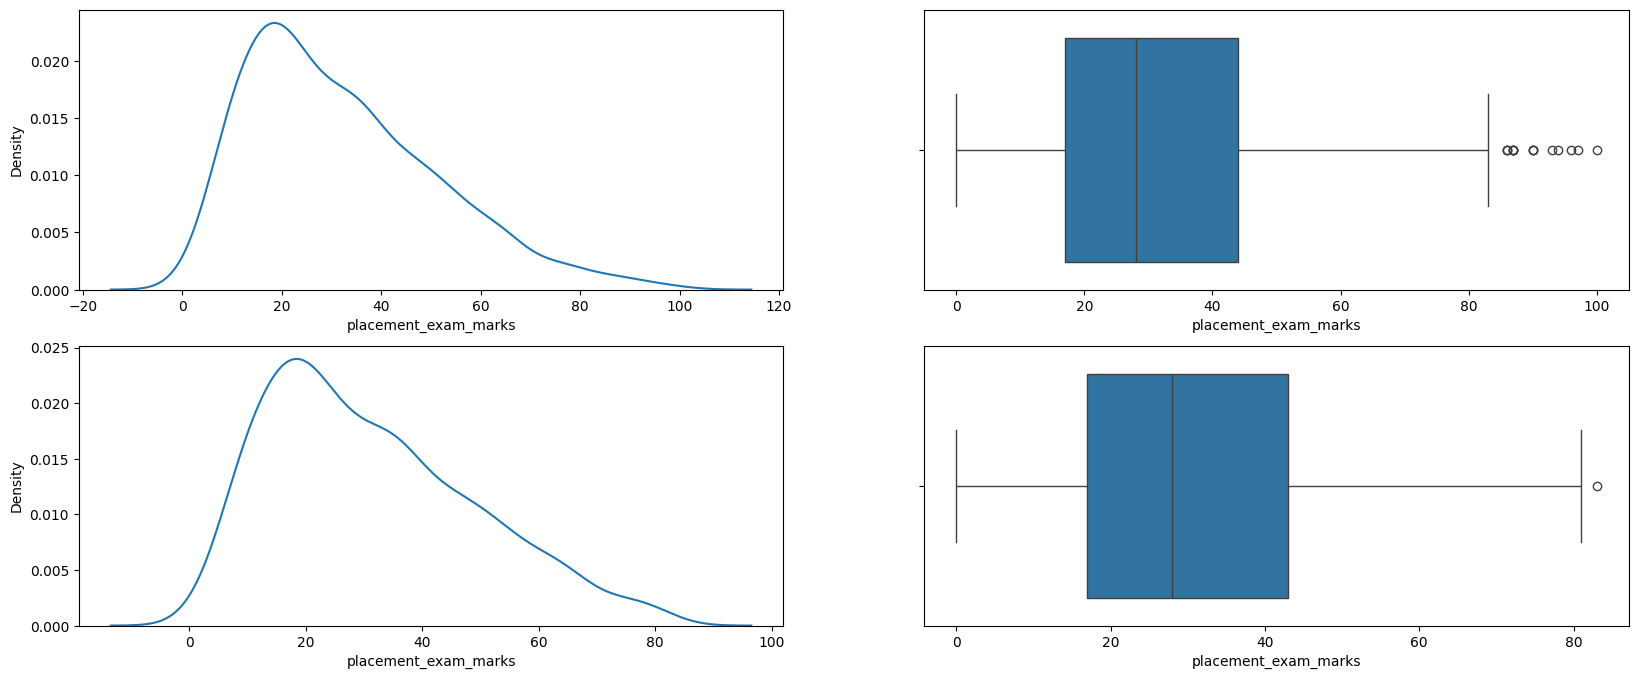

In [46]:
plt.figure(figsize=(20,8))

plt.subplot(221)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(223)
sns.kdeplot(new_df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x=new_df['placement_exam_marks'])


plt.show()

# you can clearly see in the new data, there is less number of outliers

### **Type 2 - Capping**

In [53]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

new_df_cap.shape


(1000, 3)

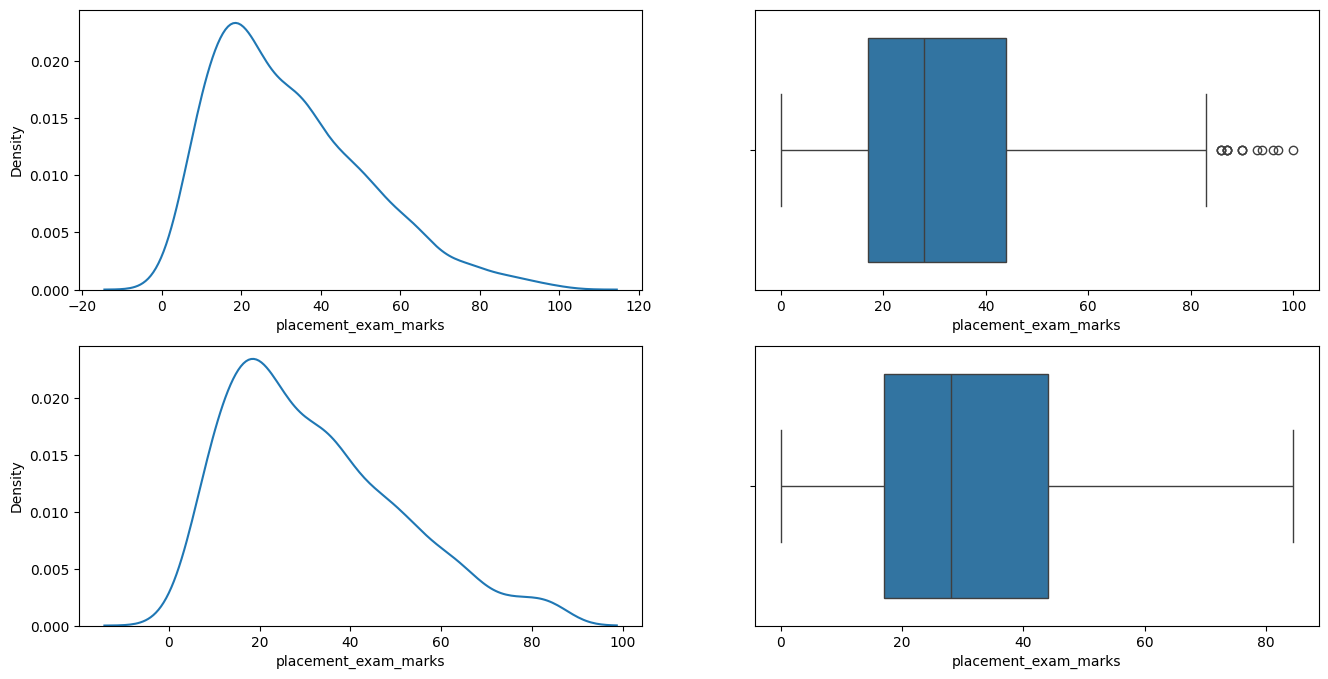

In [63]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x=new_df_cap['placement_exam_marks'])

plt.show()

### **Graph Comparison**

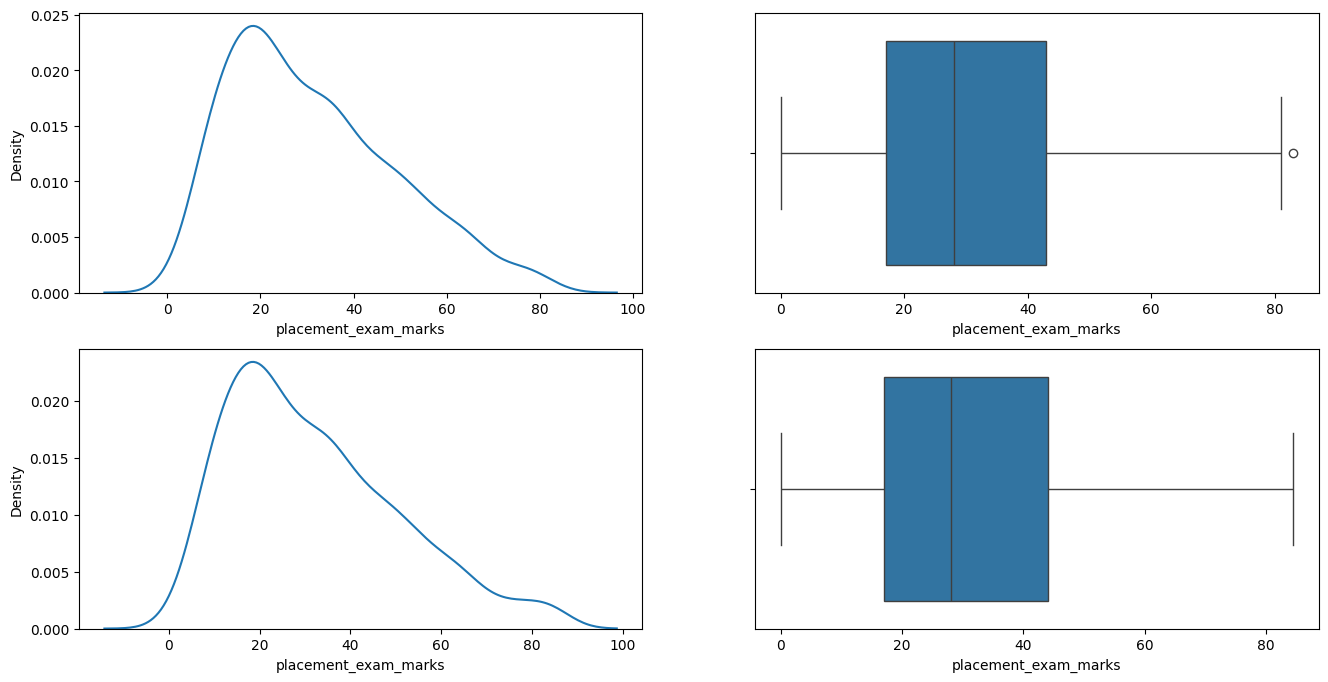

In [64]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.kdeplot(new_df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x=new_df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x=new_df_cap['placement_exam_marks'])

plt.show()

## **Handling Outliers Without Data Loss**

### The Problem: Cascading Data Loss
 Think of a situation where, you are working on a dataset and it has 3 features called a, b, and c. Suppose c has outliers in it, if you remove the outliers it will also remove same rows from feature a, and b. Now imagine, if both a, and b features also hold outliers if you deal with them and remove the outliers, then it will drastically reduce the data set. 
 
**DATA LOSS IS THE MAJOR ISSUE DURING THE OUTLIER REMOVAL**

*   **Row Connectivity:** A row represents a single observation. Deleting a row because of an outlier in Feature C removes perfectly valid data in Feature A and Feature B for that same observation.
*   **Compound Effect:** If you remove outliers from A, then from B, then from C, you are filtering the dataset three separate times. If the outliers typically occur in different rows, you might lose a massive portion of your total data.


### Better Alternatives (Don't Delete!)
Instead of removing the rows (Trimming), consider these techniques to preserve your data size while handling the extreme values:

#### 1. Capping / Winsorization
*   **What it is:** Set a limit (threshold) for values. Any value passing that limit is brought down to the limit.
*   **Example:** If the 99th percentile is 100, a value of 500 becomes 100.
*   **Benefit:** You keep the row and the information from other features, but the outlier no longer skews the calculation massively.

#### 2. Transformations
*   **What it is:** Apply a mathematical function to "squash" the distribution.
*   **Popular options:** Log transformation (`np.log`), Square Root (`np.sqrt`), or Box-Cox.
*   **Benefit:** Keeps the relative order of data but pulls extreme values much closer to the average.

#### 3. Imputation
*   **What it is:** Treat outliers as if they were **Missing Values (NaN)**.
*   **Action:** Replace them with the Mean, Median, or use KNN to estimate what the value "should" have been.

#### 4. Robust Algorithms
*   **What it is:** Choose models that are naturally resistant to outliers.
*   **Models:** Random Forests, Gradient Boosting (XGBoost/LightGBM), Support Vector Machines (SVM).
*   **Avoid:** Linear Regression, Logistic Regression, KNN (these are very sensitive to distance and variance).